In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [4]:
 predict = "G3"
#axis: {0 or ‘index’, 1 or ‘columns’} or use data.drop(columns=predict)
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\Rania Fradi\AppData\Local\Temp\ipykernel_7092\324001359.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [5]:
x_train, x_test,y_train , y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [8]:
#########  WE CAN COMMENT LATER FROM HERE ###########################
# best = 0
# for i in range(30):
#     #just so when we stop comparing models and choose the one wi can still x_train..
#     x_train, x_test,y_train , y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
# ####################################


#     #model
#     linear = linear_model.LinearRegression()
#     linear.fit(x_train, y_train)

#     accuracy = linear.score(x_test, y_test)    
    
# ####################################
#     if (accuracy > best):
#         best = accuracy
#         with open("studentmodel.pickle", "wb") as f:
#             pickle.dump(linear, f)
# accuracy = best
#         # TO HERE
        

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)
####################################
print(" Accuracy: \n", accuracy)
print("\n Coefficient: \n", linear.coef_)
print("\n Interception: \n", linear.intercept_)

 Accuracy: 
 0.9279308799129846

 Coefficient: 
 [ 0.1608074   0.98061716 -0.20131977 -0.25909198  0.03902108]

 Interception: 
 -1.6228586519192358


In [9]:
#predict a student's grade
predictions = linear.predict(x_test)


for x in range(len(predictions)):
    #prediction, actual grade, data[/predict]
    print(predictions[x], y_test[x], x_test[x],)

12.350615475265839 11 [14 12  1  0  4]
13.954445726157264 14 [14 14  2  0  0]
8.798341068883957 10 [10  9  2  0 10]
7.656916503708596 8 [ 9  8  2  0 10]
5.763154002740457 8 [7 7 3 0 0]
9.040308695972557 9 [10  9  3  1 28]
7.631950979283738 7 [ 9  8  2  1 16]
19.41501332388976 20 [19 19  4  0  4]
8.242599803496818 10 [8 9 2 0 4]
10.851786836666953 10 [13 11  2  0  0]
8.408130303298345 9 [10  9  2  0  0]
8.005490768919788 0 [10  9  4  0  0]
13.359316232801763 14 [13 13  2  0 14]
13.198508829783878 12 [12 13  2  0 14]
9.223216965654291 10 [ 8 10  2  0  4]
10.76902158676619 12 [12 11  2  0  2]
10.608214183748302 11 [11 11  2  0  2]
17.21791201866546 17 [16 17  2  0  0]
7.204210424752393 8 [8 8 1 1 4]
6.9884679540196135 6 [ 9  7  2  0 18]
10.052105766951362 10 [10 10  2  0 17]
3.266475858457497 0 [6 5 1 3 0]
15.646888459936124 15 [16 15  2  0 10]
9.466789618572943 11 [10 10  2  0  2]
6.942108356861549 8 [9 8 4 0 2]
12.033723766013706 12 [13 12  1  0  0]
15.17391244444975 14 [15 15  2  0  2]

Text(0, 0.5, 'Final grade')

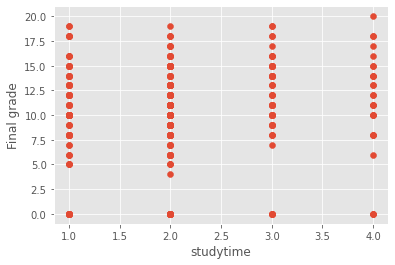

In [17]:
pyplot.style.use("ggplot")

p = "studytime"
pyplot.scatter(data[p], data[predict])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")